In [ ]:
pip install pandas_ta

     |████████████████████████████████| 115 kB 7.1 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=87a6b8e0fd39490ceb3a80628d41f9ee59297143e1f1bb06c2b22ac2bdd48cec
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt


In [ ]:
mydf = pd.DataFrame()
mydf.ta.indicators()
# if need help on a indicator
# help(indicator_name)

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

- download prices data from an online source
- load data into framework
- check and clean data content
- quick statistical analysis to reveal hidden patterns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving USDCHF_Candlestick_4_Hour_BID_05.05.2003-19.10.2019.csv to USDCHF_Candlestick_4_Hour_BID_05.05.2003-19.10.2019.csv


In [ ]:
df = pd.read_csv('USDCHF_Candlestick_4_Hour_BID_05.05.2003-19.10.2019.csv')
df.tail()

,Local time,Open,High,Low,Close,Volume
36084,19.10.2019 05:00:00.000 GMT+0800,0.98381,0.98381,0.98381,0.98381,0.0
36085,19.10.2019 09:00:00.000 GMT+0800,0.98381,0.98381,0.98381,0.98381,0.0
36086,19.10.2019 13:00:00.000 GMT+0800,0.98381,0.98381,0.98381,0.98381,0.0
36087,19.10.2019 17:00:00.000 GMT+0800,0.98381,0.98381,0.98381,0.98381,0.0
36088,19.10.2019 21:00:00.000 GMT+0800,0.98381,0.98381,0.98381,0.98381,0.0


In [ ]:
# Check for zero volume rows
indexZeros = df[df['Volume'] == 0].index

df.drop(indexZeros, inplace = True)
df.loc[(df['Volume'] == 0)]
df.isna().sum()

Local time    0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

In [ ]:
# to see which indicators are available for this df
# df.ta.indicators()

# average true range (last 20 bars)
df['ATR'] = df.ta.atr(length = 20)
# relative strength index (no parameters, default 14 bars)
df['RSI'] = df.ta.rsi()
# mid price of bar for each bar
df['Average'] = df.ta.midprice(length = 1) #midprice
# Common practice to consider 3 moving averages sensitivities in fx
# larger duration = less sensitive
df['SMA40'] = df.ta.sma(length=40)
df['SMA80'] = df.ta.sma(length=80)
df['SMA160'] = df.ta.sma(length=160)

# fits line through data points
from scipy.stats import linregress
def get_slope(array):
  y = np.array(array)
  x = np.arange(len(y))
  slope, intercept, r_value, p_value, std_err = linregress(x, y)
  return slope

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# taking last 6 values of each feature to calculate the slope
# could increase this as a variable, 6 is a good enough number to guess the trend of each of these features
backrollingN = 6
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
df['slopeSMA40'] = df['SMA40'].rolling(window = backrollingN).apply(get_slope, raw = True)
df['slopeSMA80'] = df['SMA80'].rolling(window = backrollingN).apply(get_slope, raw = True)
df['slopeSMA160'] = df['SMA160'].rolling(window = backrollingN).apply(get_slope, raw = True)
df['AverageSlope'] = df['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['RSISlope'] = df['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)


- still have starting columns
- added ATR RSI midprice SMA and slopes
- negative slope heading downwards
- positive slope heading upwards

In [ ]:
df.tail()

,Local time,Open,High,Low,Close,Volume,ATR,RSI,Average,SMA40,SMA80,SMA160,slopeSMA40,slopeSMA80,slopeSMA160,AverageSlope,RSISlope
36079,18.10.2019 09:00:00.000 GMT+0800,0.98751,0.98788,0.98710,0.98729,8599.1801,0.002054,25.974024,0.987490,0.995163,0.995575,0.993604,-0.000150,-0.000098,-0.000031,-0.001109,-1.449046
36080,18.10.2019 13:00:00.000 GMT+0800,0.98730,0.98902,0.98649,0.98802,13008.8800,0.002078,30.045762,0.987755,0.994966,0.995448,0.993572,-0.000165,-0.000117,-0.000033,-0.000525,0.770615
36081,18.10.2019 17:00:00.000 GMT+0800,0.98803,0.98912,0.98574,0.98723,14854.8200,0.002143,28.235740,0.987430,0.994751,0.995300,0.993537,-0.000179,-0.000129,-0.000035,-0.000018,0.963949
36082,18.10.2019 21:00:00.000 GMT+0800,0.98721,0.98803,0.98454,0.98463,24472.8696,0.002211,23.267701,0.986285,0.994497,0.995098,0.993480,-0.000199,-0.000143,-0.000039,-0.000144,-0.214687
36083,19.10.2019 01:00:00.000 GMT+0800,0.98463,0.98603,0.98381,0.98381,12800.4002,0.002211,21.955632,0.984920,0.994220,0.994891,0.993420,-0.000224,-0.000161,-0.000043,-0.000441,-0.919182


# Target categories
- hard part is defining your target
- lots of people try to guess future price for next few days: Too ambitious?
- much easier to define categories for your target:
  - if price will go up 100 pips, down 100 pips, or remain same
  - category 0: unclear trend
  - category 1: downward trend
  - category 2: upward trend

In [ ]:
#Target flexible way
pipdiff = 500*1e-5 #for TP
SLTPRatio = 2 #pipdiff/Ratio gives SL

def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    trendcat = [None] * length
    
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)

            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
            
    return trendcat

In [ ]:
# when running this function mytarget
# add results to mytarget column
df['mytarget'] = mytarget(16, df)
df.head()

,Local time,Open,High,Low,Close,Volume,ATR,RSI,Average,SMA40,SMA80,SMA160,slopeSMA40,slopeSMA80,slopeSMA160,AverageSlope,RSISlope,mytarget
2,05.05.2003 05:00:00.000 GMT+0800,1.34371,1.34494,1.34298,1.34322,30749.3999,NaN,NaN,1.343960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,05.05.2003 09:00:00.000 GMT+0800,1.34361,1.34653,1.34333,1.34542,31195.1006,NaN,NaN,1.344930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,05.05.2003 13:00:00.000 GMT+0800,1.34571,1.34885,1.34494,1.34820,30622.8994,NaN,NaN,1.346895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,05.05.2003 17:00:00.000 GMT+0800,1.34807,1.34956,1.34646,1.34847,29877.6001,NaN,NaN,1.348010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,05.05.2003 21:00:00.000 GMT+0800,1.34835,1.34938,1.34107,1.34331,88632.6719,NaN,NaN,1.345225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


#Quick analysis example

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


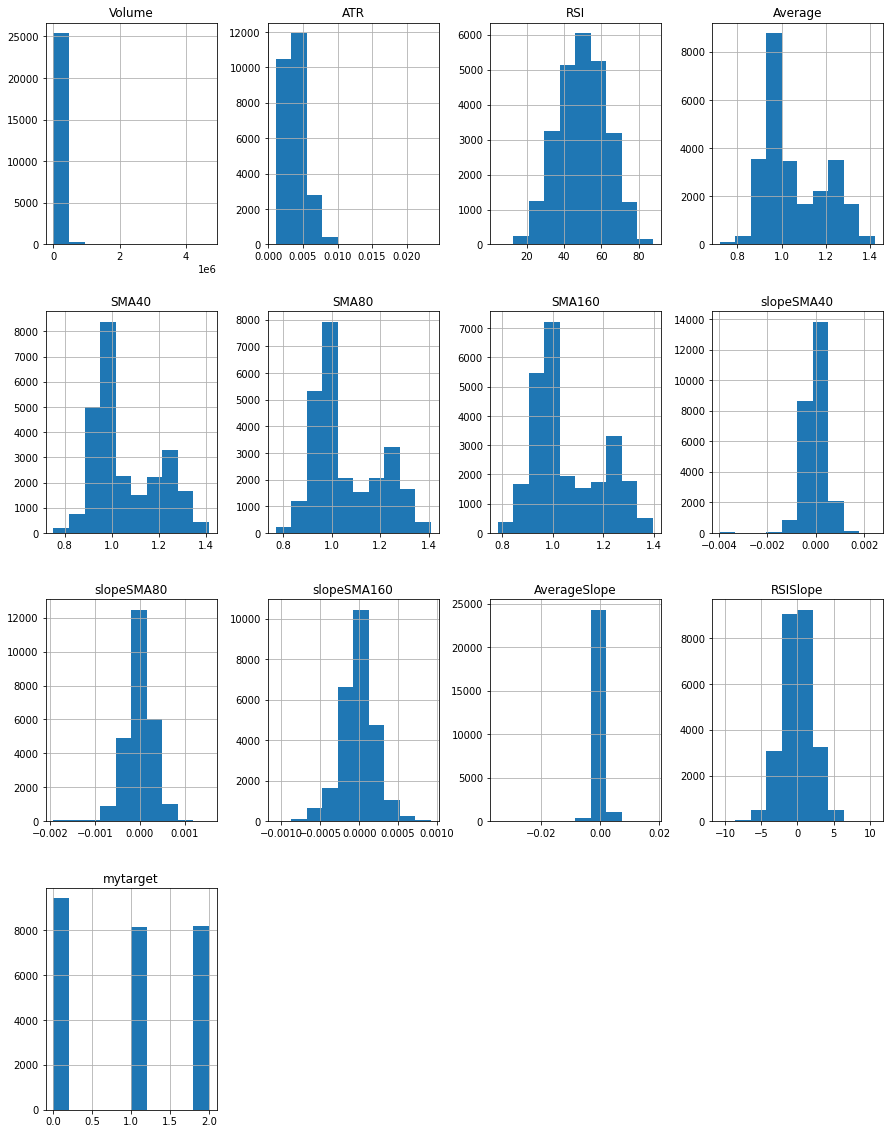

In [ ]:
# used to take quick look at your data
# to see if you ahve outliers or weird data

#import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,20))
# fig.gca() = get current axes
# can then get subplots
ax = fig.gca()
df_model= df[['Volume', 'ATR', 'RSI', 'Average', 'SMA40', 'SMA80', 'SMA160', 'slopeSMA40', 'slopeSMA80', 'slopeSMA160', 'AverageSlope', 'RSISlope', 'mytarget']] 
df_model.hist(ax = ax)
plt.show()

For mytarget bar graph
- notice how uptrend(2) and downtrend(1) are pretty similar in frequency
- however, no trend (0) is slightly higher frequency (should be taken into account, if going to fit into ML model)

# Use RSI alone as trend indicator?

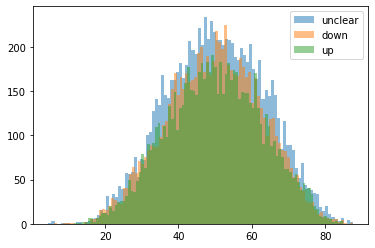

In [ ]:
#import matplotlib.pyplot as plt
#filter them based on conditions and store them into corresponding new dataframes
df_up = df.RSI[df['mytarget'] == 2]
df_down = df.RSI[df['mytarget'] == 1]
df_unclear = df.RSI[df['mytarget'] == 0]
#plot histograms for 3 categories
plt.hist(df_unclear, bins = 100, alpha = 0.5, label = 'unclear')
plt.hist(df_down, bins = 100, alpha = 0.5, label = 'down')
plt.hist(df_up, bins = 100, alpha = 0.5, label = 'up')
plt.legend(loc = 'upper right')
plt.show()

- RSI are symmetrical
- no visible difference between 3 histograms
  - 3 trend categories will same values with same probabilities for RSI
    - quite deceiving
    - cannot guess price trend solely based on RSI

# Backtesting Candlestick Strategy

#### Followed Youtube tutorial by CodeTrading
#### https://youtu.be/eN4zh3PEH6c
- doji -> undecided
- shooting star -> see it during uptrend -> trend reversal?
- hammer -> see during uptrend -> trend reversal?
- bullish engulfing -> during downtrend -> potential uptrend after
- bearish engulfing -> during uptrend -> potential downtrend after
- 3 crows?
--------------------
- specifically interested in hammer, or shooting star here
- code this pattern into python
- backtest candlestick strategy to see if it's a winning indicator or random
- when see hammer, sell signal
- (high - open) / body > certain ratio1 (2x higher, 3x? 4x?)
  - test it
- body = open - close
- don't want lower tail to be too big
  - (close - low) / (high - open) < ratio2 (0.5x? 0.25x? of long tail)
-------------------
For buy signal (hammer?):
- same approach, take symmetrical values
- using candlesticks not really enough to get accurate buy/sell signals
- combined with favorite indicator, here use RSI
- candlestick + some technical indicator (or fundamental indicator)

Need stop loss signal
- SL = price - ATR
  - common use of ATR (to decide where stop loss will be)
  - not too close to trigger often, nor too far which will lead to big losses
  - volatile market then ATR will be larger so SL far from price, no volatility then small ATR so SL close to price
- TP = price + TPSLRatio * ATR
  - take profit
  - TPSLRatio = 2 for this case, so take profit is twice as far as stop loss so every winning trade will make up for every 2 losing trades

- calculate SL, then calculate TP, then run program
- given TPSLRatio = 2, each win makes up for 2 losses, so we need to have win rate > 33-34% of the time to have winning system (doesn't include costs of trade)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving USDJPY_Candlestick_1_D_ASK_05.05.2003-19.10.2019.csv to USDJPY_Candlestick_1_D_ASK_05.05.2003-19.10.2019.csv


In [ ]:
import pandas as pd
df = pd.read_csv('USDJPY_Candlestick_1_D_ASK_05.05.2003-19.10.2019.csv')
df.tail()

,Local time,Open,High,Low,Close,Volume
6008,15.10.2019 05:00:00.000 GMT+0800,108.408,108.901,108.157,108.868,161800.8202
6009,16.10.2019 05:00:00.000 GMT+0800,108.878,108.878,108.565,108.792,178244.1814
6010,17.10.2019 05:00:00.000 GMT+0800,108.793,108.941,108.454,108.692,234278.7696
6011,18.10.2019 05:00:00.000 GMT+0800,108.706,108.724,108.388,108.433,148743.3615
6012,19.10.2019 05:00:00.000 GMT+0800,108.433,108.433,108.433,108.433,0.0000


In [ ]:
# test is volume = 0 b/c these are days something wrong in data itself?
indexZeros = df[df['Volume'] == 0].index

df.drop(indexZeros, inplace = True)
df.loc[(df['Volume'] == 0)]
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

Local time    0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

In [ ]:
df.tail()

,Local time,Open,High,Low,Close,Volume
6007,14.10.2019 05:00:00.000 GMT+0800,108.372,108.525,108.033,108.404,122267.0403
6008,15.10.2019 05:00:00.000 GMT+0800,108.408,108.901,108.157,108.868,161800.8202
6009,16.10.2019 05:00:00.000 GMT+0800,108.878,108.878,108.565,108.792,178244.1814
6010,17.10.2019 05:00:00.000 GMT+0800,108.793,108.941,108.454,108.692,234278.7696
6011,18.10.2019 05:00:00.000 GMT+0800,108.706,108.724,108.388,108.433,148743.3615


In [ ]:
pip install pandas_ta

     |████████████████████████████████| 115 kB 8.7 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=6a33743c33bbb7f788fed8011d099d4c81450450f25b2d253e4fcf487645c9e5
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import numpy as np
import pandas_ta as ta
#df.ta.indicators()
#help(ta.atr)

# strategy needs ATR and RSI so add into df

# length = 10 last 10 days
df['ATR'] = df.ta.atr(length=10)
# default last 14 days for RSI
df['RSI'] = df.ta.rsi()

In [ ]:
#for down trends
# shooting star

# define function that takes df and provides back signal (buy/sell) according to candlestick pattern
def Revsignal1(df1):
  df.dropna()
  # reset_index b/c when dropna, index won't be consecutive numbers
  df.reset_index(drop = True, inplace = True)

  length = len(df1)
  high = list(df1['High'])
  low = list(df1['Low'])
  close = list(df1['Close'])
  open = list(df1['Open'])
  # 0 value list of same length of dataframe
  signal = [0] * length
  highdiff = [0] * length
  lowdiff = [0] * length
  bodydiff = [0] * length
  ratio1 = [0] * length
  ratio2 = [0] * length

  #start analysis in this function
  for row in range(0, length):

    # highest value - max(open and close) = length of high tail above body
    highdiff[row] = high[row] - max(open[row], close[row])
    # length of body
    bodydiff[row] = abs(open[row] - close[row])
    # b/c bodydiff will affect calculation, don't want 0
    # just in case open price = close price, 0.002 chose randomly
    # cannot go below 0.002
    if bodydiff[row] < 0.002:
      bodydiff[row] = 0.002
    # length of small tail below body
    lowdiff[row] = min(open[row], close[row]) - low[row]
    # long tail length / body length
    ratio1[row] = highdiff[row] / bodydiff[row]
    # low tail length / body length
    ratio2[row] = lowdiff[row] / bodydiff[row]

  # start looking for sell signal (shooting star)
  # length of upper tail / length of body > 2.5 and
  # low tail shorter than 1/3 of upper tail
  # 0.3 and 2.5? parameters you can optimize on your own
  # to have shooting star form, makes sense to choose ratio1 > 2
  # low tail can be 0.2 or 0.3
  # don't want small body, so want bodydiff > 0.03
  # RSI btwn 50 and 70 b/c below 50 may mean oversold
  # > 70 might indicate strong upward trend
    if (ratio1[row] > 2.5 and lowdiff[row] < 0.3 * highdiff[row] and bodydiff[row] > 0.03 and df.RSI[row] > 50 and df.RSI[row] < 70):
      # sell signal category = 1
      signal[row] = 1
  
  #elif (ratio2[row-1]>2.5 and highdiff[row-1]<0.23*lowdiff[row-1] and bodydiff[row-1]>0.03 and bodydiff[row]>0.04 and close[row]>open[row] and close[row]>high[row-1] and df.RSI[row]<55 and df.RSI[row]>30):
  # signal[row] = 2
  # _|_
  # |__|
  #  |
  #  |

  # not symmetrical to sell signal, detecting buying signal
  # symmetrical form. < 55 but > 30
  # very interesting. market is not symmetrical. cannot use same conditions for selling bot and buying bot
  # optimize selling and buying in independent way
    elif (ratio2[row] > 2.5 and highdiff[row] <0.23 * lowdiff[row] and bodydiff[row] > 0.03 and df.RSI[row] < 55 and df.RSI[row] > 30):
      signal[row] = 2
  return signal

df['signal1'] = Revsignal1(df)
# how many buying signals 
df[df['signal1']==2].count()

Local time    89
Open          89
High          89
Low           89
Close         89
Volume        89
ATR           89
RSI           89
signal1       89
dtype: int64

In [ ]:
# 36 selling signals for 16 years
df[df['signal1']==1].count()

Local time    36
Open          36
High          36
Low           36
Close         36
Volume        36
ATR           36
RSI           36
signal1       36
dtype: int64

In [ ]:
# now to test the strategy
# define new function

# Target Shooting Star
# starting from a certain position or a certain candle stick
# this function will look to number of bars up front, and check if price will touch stop loss
# first or take profit first
# in this case, we define if we have a winning/losing trade
# 
def mytarget(barsupfront, df1):
  length = len(df1)
  high = list(df1['High'])
  low = list(df1['Low'])
  close = list(df1['Close'])
  open = list(df1['Open'])
  datr = list(df1['ATR'])
  trendcat = [None] * length

  for line in range(0, length - barsupfront - 1):
    valueOpenLow = 0
    valueOpenHigh = 0

    highdiff = high[line] - max(open[line], close[line])
    bodydiff = abs(open[line] - close[line])

    # stop loss given here
    # gap between price and stop loss is provided by pipdiff
    pipdiff = datr[line]*1. #highdiff * 1.3 # for SL 400 * 1e-3
    # for trade to be valid, there must be a minimum for the stop loss, cannot be too close to price
    if pipdiff < 1.1:
      pipdiff = 1.1

    # defines gap between price and TP value
    SLTPRatio = 2 #pipdiff * Ratio gives TP

    for i in range(1, barsupfront + 1):
      value1 = close[line] - low[line + i]
      value2 = close[line] - high[line + i]
      valueOpenLow = max(value1, valueOpenLow)
      valueOpenHigh = min(value2, valueOpenHigh)

      if ((valueOpenLow >= (SLTPRatio * pipdiff)) and (-valueOpenHigh < pipdiff)):
        trendcat[line] = 1 #-1 downtrend
        break
      elif ((valueOpenLow < pipdiff)) and (-valueOpenHigh >= (SLTPRatio*pipdiff)):
        trendcat[line] = 2 #uptrend
        break
      else:
        trendcat[line] = 0 #no clear trend
  return trendcat

#mytarget(barsfront to take into account, dataframe)
df['Trend'] = mytarget(100, df)
df.tail(20)


Want to check signal was =1 (sell) and the real trend also =1
- % of time our signaling was correct
- for buy signals: signal = 2 and number of times signaling was correct, trend also = 2

In [ ]:
# set list of conditions
# trend & signal = 1 or trend & signal = 2
conditions = [(df['Trend'] == 1) & (df['signal1'] == 1),
              (df['Trend'] == 2) & (df['signal1'] == 2)]
values = [1, 2]
# store values in result column
df['result'] = np.select(conditions, values)

# test precision of each category signaling on its own

trendId=2
# # of times we had true positive sell signal / total number of sell signals
print(df[df['result']==trendId].result.count()/df[df['signal1']==trendId].signal1.count())
df[ (df['result']!=trendId) & (df['signal1']==trendId) ] # false positives

#histrs = df[ (df['result']==2) & (df['signal1']==2) ].RSI # false positives
#import matplotlib.pyplot as plt
#plt.hist(histrs,bins=2)  # density=False would make counts
#plt.ylabel('Probability')
#plt.xlabel('RSI');

0.42696629213483145


,Local time,Open,High,Low,Close,Volume,ATR,RSI,signal1,Trend,result
234,26.03.2004 06:00:00.000 GMT+0800,106.160,106.232,105.506,106.012,6.129534e+05,0.986751,33.080490,2,1.0,0
295,21.06.2004 05:00:00.000 GMT+0800,108.785,108.977,108.228,108.941,6.138832e+05,1.321969,42.754302,2,0.0,0
378,14.10.2004 05:00:00.000 GMT+0800,109.773,109.849,109.147,109.691,6.010409e+05,0.823047,44.578319,2,1.0,0
439,07.01.2005 06:00:00.000 GMT+0800,104.992,105.125,103.858,104.753,5.940642e+05,1.218254,54.782867,2,1.0,0
1014,23.03.2007 05:00:00.000 GMT+0800,118.103,118.248,117.411,118.135,5.904808e+05,1.153799,49.872895,2,0.0,0
1093,12.07.2007 05:00:00.000 GMT+0800,122.490,122.600,121.840,122.430,4.221666e+06,0.830190,48.546249,2,1.0,0
1107,01.08.2007 05:00:00.000 GMT+0800,118.630,119.000,117.610,118.960,5.064306e+06,1.080985,32.322920,2,1.0,0
1111,07.08.2007 05:00:00.000 GMT+0800,118.900,118.990,117.980,118.850,3.556891e+06,1.169730,37.184327,2,1.0,0
1139,14.09.2007 05:00:00.000 GMT+0800,115.100,115.410,114.370,115.390,2.581671e+06,1.301338,46.721917,2,0.0,0
1175,05.11.2007 06:00:00.000 GMT+0800,114.760,114.820,114.025,114.565,3.399991e+06,0.980028,42.637528,2,1.0,0


Anything above 34% is a winner b/c SLTPRatio = 2
- can also print 

In [ ]:
dfpl = df[400:480]
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.show()